# Create a table or plot that shows the Trip Primary Mode by Age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
trip = pd.read_csv("Datasets/trip.csv")
person = pd.read_csv("Datasets/person.csv")
age_gender_code = pd.read_csv("Datasets/age_gender_codes.csv")

In [3]:
trip = trip.rename(columns = {"Primary Mode": "Primary_mode"})

## Loading the Database into MySQL

In [4]:
import pymysql

pymysql.install_as_MySQLdb()

rds_connection_string = "root:Piedmont2019@@127.0.0.1/primary_mode_transport_by_age_db"
engine = create_engine(f'mysql://{rds_connection_string}')

In [5]:
#Creating database in MySQL

trip.to_sql(name='trip', con=engine, if_exists='append', index=False)
person.to_sql(name='person', con=engine, if_exists='append', index=False)
age_gender_code.to_sql(name='age_gender', con=engine, if_exists='append', index=False)

In [6]:
#Checking the tables in the database
engine.table_names()

['age_gender', 'person', 'person_trip', 'trip']

## Calling the Database Created in MySQL and Loading into Python

In [10]:
person_trip_df = pd.read_sql_query('select * from person_trip', con=engine)
person_trip_df = pd.DataFrame(person_trip_df)

In [8]:
#Add this table into datasets for future reference
person_trip_df.to_csv(r'C:\Users\Irwin\Desktop\Household-Travel-Survey\Datasets\person_trip_age.csv', index = None, header=True)


In [9]:
#Getting rid of outlying ages not mentioned in previous age chart
person_trip_df = person_trip_df[person_trip_df.age != -2.0]
person_trip_df = person_trip_df[person_trip_df.age != 5000.0]

In [11]:
age_1 = person_trip_df[person_trip_df["age"] == 1.0]
age_1.head()

,personid,Primary_mode,age
20,1710002403,Household vehicle 1,1.0
21,1710002403,Bicycle or e-bike,1.0
118,1710020303,Household vehicle 1,1.0
119,1710020303,Household vehicle 1,1.0
120,1710020304,Household vehicle 1,1.0


## Creating the Table of Primary Mode of Transport by Age

In [10]:
by_age = person_trip_df.groupby("age").Primary_mode.value_counts()
by_age = pd.DataFrame(by_age)
by_age = by_age.rename(columns = {"Primary_mode": "Primary_mode_count"})
by_age

Primary_mode_count
age  Primary_mode                                                          
1.0  Household vehicle 1                                               1287
     Household vehicle 2                                                349
     Walk, jog, or wheelchair                                           347
     Bicycle or e-bike                                                   48
     Bus (public transit)                                                30
     Friend/colleague's car                                              19
     Other household vehicle                                             19
     Ferry or water taxi                                                 12
     Other mode (e.g., skateboard, kayak, motorhome,...                   6
     School bus                                                           6
     Urban rail (e.g., Link light rail, monorail)                         6
     Other hired service (e.g., Lyft, Uber)                               2
     Other non-household vehicle                                          2
     Rental car                                                           2
     Other bus (rMove only)                                               1
2.0  Household vehicle 1                                                916
     Household vehicle 2                                                462
     Walk, jog, or wheelchair                                           262
     School bus                                                         191
     Bicycle or e-bike                                                   37
     Friend/colleague's car                                              30
     Bus (public transit)                                                24
     Urban rail (e.g., Link light rail, monorail)                        15
     Other hired service (e.g., Lyft, Uber)                               8
     Household vehicle 3                                                  7
     Other mode (e.g., skateboard, kayak, motorhome,...                   7
     Rental car                                                           6
     Ferry or water taxi                                                  5
     Other household vehicle                                              5
     Private bus or shuttle                                               5
...                                                                     ...
10.0 Other rail (e.g., streetcar)                                         2
     Other bus (rMove only)                                               1
     School bus                                                           1
     Taxi (e.g., Yello Cab)                                               1
     Vanpool vehicle                                                      1
11.0 Household vehicle 1                                                407
     Walk, jog, or wheelchair                                           177
     Household vehicle 2                                                 62
     Bus (public transit)                                                39
     Household vehicle 3                                                 29
     Friend/colleague's car                                              14
     Other non-household vehicle                                          6
     Other household vehicle                                              4
     Vanpool vehicle                                                      4
     Bicycle or e-bike                                                    2
     Other bus (rMove only)                                               2
     Other hired service (e.g., Lyft, Uber)                               2
     Other rail (e.g., streetcar)                                         2
     Urban rail (e.g., Link light rail, monorail)                         2
     Car from work                                                        1
     Ferry or water taxi     

In [11]:
primary_mode_count = by_age[by_age["Primary_mode_count"] > 40]
primary_mode_count = pd.DataFrame(primary_mode_count)
primary_mode_count

Primary_mode_count
age  Primary_mode                                                    
1.0  Household vehicle 1                                         1287
     Household vehicle 2                                          349
     Walk, jog, or wheelchair                                     347
     Bicycle or e-bike                                             48
2.0  Household vehicle 1                                          916
     Household vehicle 2                                          462
     Walk, jog, or wheelchair                                     262
     School bus                                                   191
3.0  Household vehicle 1                                          285
     Household vehicle 2                                          127
     Walk, jog, or wheelchair                                      90
     School bus                                                    68
4.0  Household vehicle 1                                          121
     Household vehicle 2                                          101
5.0  Household vehicle 1                                          963
     Walk, jog, or wheelchair                                     886
     Bus (public transit)                                         406
     Household vehicle 2                                          268
     Other household vehicle                                      128
     Friend/colleague's car                                       101
     Car from work                                                 77
     Bicycle or e-bike                                             69
     Other hired service (e.g., Lyft, Uber)                        63
     Urban rail (e.g., Link light rail, monorail)                  50
     Household vehicle 3                                           47
6.0  Household vehicle 1                                         6923
     Walk, jog, or wheelchair                                    4296
     Bus (public transit)                                        1660
     Household vehicle 2                                         1652
     Friend/colleague's car                                       551
...                                                               ...
8.0  Bus (public transit)                                         385
     Friend/colleague's car                                       146
     Bicycle or e-bike                                             97
     Household vehicle 3                                           74
     Other household vehicle                                       63
     Rental car                                                    51
     Other bus (rMove only)                                        50
     Other hired service (e.g., Lyft, Uber)                        44
9.0  Household vehicle 1                                         2161
     Household vehicle 2                                          823
     Walk, jog, or wheelchair                                     757
     Bus (public transit)                                         342
     Household vehicle 3                                          201
     Car from work                                                160
     Bicycle or e-bike                                            104
     Friend/colleague's car                                        95
     Urban rail (e.g., Link light rail, monorail)                  68
     Other household vehicle                                       42
     School bus                                                    41
10.0 Household vehicle 1                                         1594
     Walk, jog, or wheelchair                                     592
     Household vehicle 2                                          435
     Household vehicle 3                                          191
     Bus (public transit)                                         166
     Rental car                                              

In [12]:
primary_mode_count.groupby(['age','Primary_mode']).sum()['Primary_mode_count'].unstack()



Primary_mode,Airplane or helicopter,Bicycle or e-bike,Bus (public transit),Car from work,"Carshare vehicle (e.g., Zipcar, Car2Go, RelayRides, etc.)",Friend/colleague's car,Household vehicle 1,Household vehicle 2,Household vehicle 3,Other bus (rMove only),"Other hired service (e.g., Lyft, Uber)",Other household vehicle,Other non-household vehicle,Private bus or shuttle,Rental car,School bus,"Urban rail (e.g., Link light rail, monorail)","Walk, jog, or wheelchair"
age,,,,,,,,,,,,,,,,,,
1.0,NaN,48.0,NaN,NaN,NaN,NaN,1287.0,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347.0
2.0,NaN,NaN,NaN,NaN,NaN,NaN,916.0,462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0,NaN,262.0
3.0,NaN,NaN,NaN,NaN,NaN,NaN,285.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,90.0
4.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,69.0,406.0,77.0,NaN,101.0,963.0,268.0,47.0,NaN,63.0,128.0,NaN,NaN,NaN,NaN,50.0,886.0
6.0,48.0,464.0,1660.0,209.0,53.0,551.0,6923.0,1652.0,59.0,NaN,287.0,330.0,111.0,70.0,133.0,NaN,239.0,4296.0
7.0,NaN,337.0,714.0,121.0,NaN,218.0,4384.0,1543.0,62.0,NaN,132.0,108.0,75.0,NaN,76.0,NaN,204.0,2314.0
8.0,NaN,97.0,385.0,NaN,NaN,146.0,3234.0,958.0,74.0,50.0,44.0,63.0,NaN,NaN,51.0,NaN,NaN,1067.0
9.0,NaN,104.0,342.0,160.0,NaN,95.0,2161.0,823.0,201.0,NaN,NaN,42.0,NaN,NaN,NaN,41.0,68.0,757.0


In [13]:

primary_mode_count.to_csv (r'C:\Users\Irwin\Desktop\Household-Travel-Survey\Datasets\primary_mode_dataframe.csv', index = None, header=True)


## Making the Bar Chart for Priamry Mode of Transportation

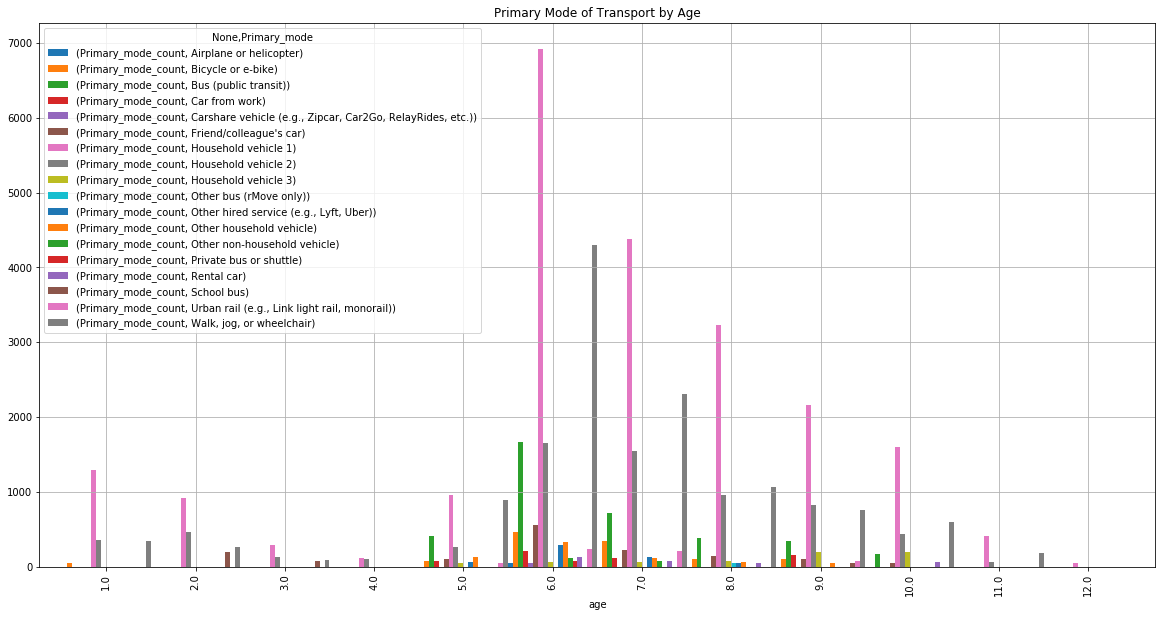

In [88]:
primary_mode_count.groupby(['age','Primary_mode']).sum().unstack(fill_value=0).plot.bar(figsize = (20,10), width = 1)
plt.title("Primary Mode of Transport by Age")
plt.grid()

plt.savefig("Visualizations/primary_mode_of_transport_by_age.png", dpi = 140)


Age Group Breakdowns:

1.0 = Under 5 years old

2.0 = From 5-11 years old

3.0 = From 12-15 years old

4.0 = From 16-17 years old

5.0 = From 18-24 years old

6.0 = From 25-34 years old

7.0 = From 35-44 years old

8.0 = From 45-54 years old

9.0 = From 55-64 years old

10.0 = From 65-74 years old

11.0 = From 75-84 years old

12.0 = From 85 and over

Side Note: Bar graphs by age group begin with the blue bar graph representing Airplane or helicopter while they end with the second grey graph representing Walk, Jog, or wheelchair. 

## What the Table Shows

Looking into all the different age groups surveyed, every single group has taken a primary household vehicle as their most frequent mode of transportation. From the age groups of 6(25-34), 7(35-44), 8(45-54), and 10(65-74), walking is the second primary mode of transportation followed by a secondary household vehicle being the third most used mode of transport. Bus transit is most frequent among the age groups of 5(18-24), 6, 7, and 8. The survey skews towards the age groups of 6, 7, and 8, as they typically have the most trips made out of all the other groups. 